In [41]:
import uproot
import awkward
import numpy as np
import pandas as pd
from uproot_methods import TLorentzVectorArray

from coffea.processor import LazyDataFrame
from coffea.analysis_objects import JaggedCandidateArray

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import tensorflow as tf

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_hdf('data/data_X.h5') # load data processed with ML_processor.py

sig_df = df[df['signal']==1]
bkg_df = df[df['signal']==0]

# usually we have less signal than background
nSmall = len(sig_df) if len(sig_df) < len(bkg_df) else len(bkg_df)

# Balance the signal and background sets
tmp_bkg_df = bkg_df.sample( n = nSmall )
tmp_sig_df = sig_df.sample( n = nSmall )

y_sig = np.ones(len(tmp_sig_df))
y_bkg = np.zeros(len(tmp_bkg_df))
y_tmp = np.concatenate((y_sig,y_bkg))

# merge signal and background
frames = [tmp_sig_df, tmp_bkg_df]
X_tmp = pd.concat(frames)

print ("The smaller data set contains %s events"%nSmall)

# Splitting in training and test samples
X_tmp_train, X_tmp_test, y_train, y_test = train_test_split(X_tmp, y_tmp, train_size= int( 0.9*y_tmp.shape[0] ), random_state=42 )

variables = ['met','ht','lead_jet_pt','sublead_jet_pt','njets','bjets','nWs','nHs','nFatJets','met_significance','min_dphi_met_j4']

X_train = X_tmp_train[variables]
X_test = X_tmp_test[variables]

The smaller data set contains 15714 events


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-scikit-learn/0.19.1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


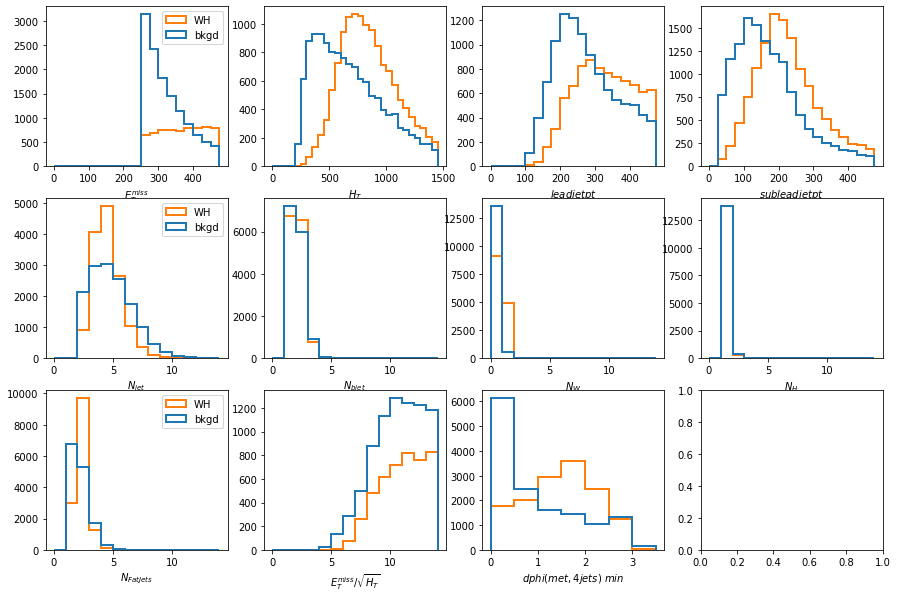

In [44]:
X_bkg = X_train[y_train==0]
X_sig = X_train[y_train==1]

fig, axs = plt.subplots(3,4, figsize=(15,10))

phibins = [0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]

hist, bins, ax = axs[0,0].hist( [ X_bkg[['met']].values.flatten(), X_sig[['met']].values.flatten() ], range(0,500,25), histtype='step', linewidth=2, label=['bkgd', 'WH']) 
hist, bins, ax = axs[0,1].hist( [ X_bkg[['ht']].values.flatten(), X_sig[['ht']].values.flatten() ], range(0,1500,50), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[0,2].hist( [ X_bkg[['lead_jet_pt']].values.flatten(), X_sig[['lead_jet_pt']].values.flatten() ], range(0,500,25), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[0,3].hist( [ X_bkg[['sublead_jet_pt']].values.flatten(), X_sig[['sublead_jet_pt']].values.flatten() ], range(0,500,25), histtype='step', linewidth=2, label=['bkgd','WH']) 
#hist, bins, ax = axs[1,0].hist( [ X_bkg[['lead_jet_eta']].values.flatten(), X_sig[['lead_jet_eta']].values.flatten() ], range(0,3,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
#hist, bins, ax = axs[1,1].hist( [ X_bkg[['sublead_jet_eta']].values.flatten(), X_sig[['sublead_jet_eta']].values.flatten() ], range(0,3,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,0].hist( [ X_bkg[['njets']].values.flatten(), X_sig[['njets']].values.flatten() ], range(0,15,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,1].hist( [ X_bkg[['bjets']].values.flatten(), X_sig[['bjets']].values.flatten() ], range(0,15,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,2].hist( [ X_bkg[['nWs']].values.flatten(), X_sig[['nWs']].values.flatten() ], range(0,15,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,3].hist( [ X_bkg[['nHs']].values.flatten(), X_sig[['nHs']].values.flatten() ], range(0,15,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[2,0].hist( [ X_bkg[['nFatJets']].values.flatten(), X_sig[['nFatJets']].values.flatten() ], range(0,15,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[2,1].hist( [ X_bkg[['met_significance']].values.flatten(), X_sig[['met_significance']].values.flatten() ], range(0,15,1), histtype='step', linewidth=2, label=['bkgd','WH']) 
#hist, bins, ax = axs[1,0].hist( [ X_bkg[['min_dphi_met_j1']].values.flatten(), X_sig[['min_dphi_met_j1']].values.flatten() ], phibins, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
#hist, bins, ax = axs[2,2].hist( [ X_bkg[['min_dphi_met_j2']].values.flatten(), X_sig[['min_dphi_met_j2']].values.flatten() ], phibins, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
#hist, bins, ax = axs[2,3].hist( [ X_bkg[['dR_fj1_fj2']].values.flatten(), X_sig[['dR_fj1_fj2']].values.flatten() ], phibins, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
#hist, bins, ax = axs[1,2].hist( [ X_bkg[['min_dphi_met_j3']].values.flatten(), X_sig[['min_dphi_met_j3']].values.flatten() ], phibins, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
hist, bins, ax = axs[2,2].hist( [ X_bkg[['min_dphi_met_j4']].values.flatten(), X_sig[['min_dphi_met_j4']].values.flatten() ], phibins, histtype='step', linewidth=2, label=['bkgd', 'WH']) 

axs[0,0].set_xlabel(r'$E_{T}^{miss}$')
axs[0,1].set_xlabel(r'$H_{T}$')
axs[0,2].set_xlabel(r'$lead jet pt$')
axs[0,3].set_xlabel(r'$sublead jet pt$')
#axs[1,0].set_xlabel(r'$lead jet eta$')
#axs[1,1].set_xlabel(r'$sublead jet eta$')
axs[1,0].set_xlabel(r'$N_{jet}$')
axs[1,1].set_xlabel(r'$N_{b jet}$')
axs[1,2].set_xlabel(r'$N_{W}$')
axs[1,3].set_xlabel(r'$N_{H}$')
axs[2,0].set_xlabel(r'$N_{FatJets}$')
axs[2,1].set_xlabel(r'$E_{T}^{miss}/\sqrt{H_{T}}$')
#axs[1,0].set_xlabel(r'$dphi(met,j0)~{min}$')
axs[2,2].set_xlabel(r'$dphi(met,4 jets)~{min}$')
#axs[2,3].set_xlabel(r'$dR(2 lead fatjets)$')
#axs[1,2].set_xlabel(r'$dphi(met,j2)~{min}$')
#axs[1,3].set_xlabel(r'$dphi(met,j3)~{min}$')

axs[0,0].legend()
axs[1,0].legend()
axs[2,0].legend()
#axs[3,0].legend()

plt.savefig('plots/training_vars.pdf')

In [45]:
# Normalize Data - mean to 0, and std to 1 
X_mean, X_std = X_train.mean(), X_train.std()

X_train -= X_mean
X_train /= X_std

X_test -= X_mean
X_test /= X_std

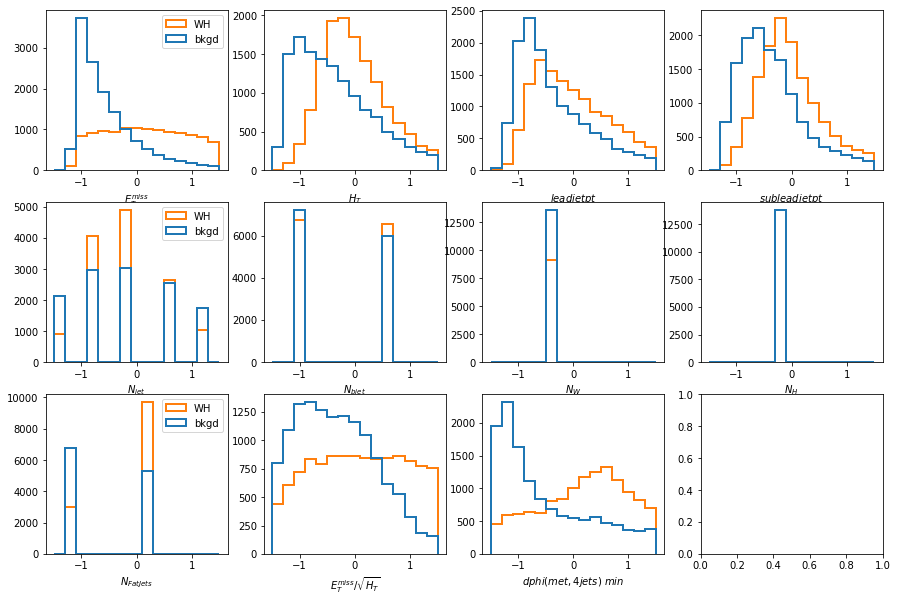

In [46]:
X_bkg = X_train[y_train==0]
X_sig = X_train[y_train==1]

fig, axs = plt.subplots(3,4, figsize=(15,10))

binning = [-1.5,-1.3,-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5]

hist, bins, ax = axs[0,0].hist( [ X_bkg[['met']].values.flatten(), X_sig[['met']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
hist, bins, ax = axs[0,1].hist( [ X_bkg[['ht']].values.flatten(), X_sig[['ht']].values.flatten() ], binning, histtype='step', linewidth=2) 
hist, bins, ax = axs[0,2].hist( [ X_bkg[['lead_jet_pt']].values.flatten(), X_sig[['lead_jet_pt']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[0,3].hist( [ X_bkg[['sublead_jet_pt']].values.flatten(), X_sig[['sublead_jet_pt']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
#hist, bins, ax = axs[1,0].hist( [ X_bkg[['lead_jet_eta']].values.flatten(), X_sig[['lead_jet_eta']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
#hist, bins, ax = axs[1,1].hist( [ X_bkg[['sublead_jet_eta']].values.flatten(), X_sig[['sublead_jet_eta']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,0].hist( [ X_bkg[['njets']].values.flatten(), X_sig[['njets']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,1].hist( [ X_bkg[['bjets']].values.flatten(), X_sig[['bjets']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,2].hist( [ X_bkg[['nWs']].values.flatten(), X_sig[['nWs']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[1,3].hist( [ X_bkg[['nHs']].values.flatten(), X_sig[['nHs']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[2,0].hist( [ X_bkg[['nFatJets']].values.flatten(), X_sig[['nFatJets']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
hist, bins, ax = axs[2,1].hist( [ X_bkg[['met_significance']].values.flatten(), X_sig[['met_significance']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd','WH']) 
#hist, bins, ax = axs[1,0].hist( [ X_bkg[['min_dphi_met_j1']].values.flatten(), X_sig[['min_dphi_met_j1']].values.flatten() ], binning, histtype='step', linewidth=2, label=['ttbar', 'WH']) 
#hist, bins, ax = axs[2,2].hist( [ X_bkg[['min_dphi_met_j2']].values.flatten(), X_sig[['min_dphi_met_j2']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
#hist, bins, ax = axs[2,3].hist( [ X_bkg[['dR_fj1_fj2']].values.flatten(), X_sig[['dR_fj1_fj2']].values.flatten() ], binning, histtype='step', linewidth=2, label=['bkgd', 'WH']) 
#hist, bins, ax = axs[1,2].hist( [ X_bkg[['min_dphi_met_j3']].values.flatten(), X_sig[['min_dphi_met_j3']].values.flatten() ], binning, histtype='step', linewidth=2, label=['ttbar', 'WH']) 
hist, bins, ax = axs[2,2].hist( [ X_bkg[['min_dphi_met_j4']].values.flatten(), X_sig[['min_dphi_met_j4']].values.flatten() ], binning, histtype='step', linewidth=2, label=['ttbar', 'WH']) 

axs[0,0].set_xlabel(r'$E_{T}^{miss}$')
axs[0,1].set_xlabel(r'$H_{T}$')
axs[0,2].set_xlabel(r'$lead jet pt$')
axs[0,3].set_xlabel(r'$sublead jet pt$')
#axs[1,0].set_xlabel(r'$lead jet eta$')
#axs[1,1].set_xlabel(r'$sublead jet eta$')
axs[1,0].set_xlabel(r'$N_{jet}$')
axs[1,1].set_xlabel(r'$N_{b jet}$')
axs[1,2].set_xlabel(r'$N_{W}$')
axs[1,3].set_xlabel(r'$N_{H}$')
axs[2,0].set_xlabel(r'$N_{FatJets}$')
axs[2,1].set_xlabel(r'$E_{T}^{miss}/\sqrt{H_{T}}$')
#axs[1,0].set_xlabel(r'$dphi(met,j0)~{min}$')
axs[2,2].set_xlabel(r'$dphi(met,4 jets)~{min}$')
#axs[2,3].set_xlabel(r'$dR(2 lead fatjets)$')
#axs[1,2].set_xlabel(r'$dphi(met,j2)~{min}$')
#axs[1,3].set_xlabel(r'$dphi(met,j3)~{min}$')

axs[0,0].legend()
axs[1,0].legend()
axs[2,0].legend()

plt.savefig('plots/training_vars_norm.pdf')

In [47]:
epochs = 50
batch_size = 5120
validation_split = 0.2

# define the model. Which one is the best suited for our problem?
model = tf.keras.models.Sequential()

model.add( tf.keras.layers.Dense(units=40, activation='relu', input_dim=X_train.shape[1], ))
model.add( tf.keras.layers.Dense(units=20, activation='relu', input_dim=X_train.shape[1], ))
#model.add( tf.keras.layers.Dropout( rate = 0.1 ) )
#model.add( tf.keras.layers.Dense(units=10, activation='relu' ) )
model.add( tf.keras.layers.Dense(units=1, activation='sigmoid' ) ) 

# compile the model
model.compile( loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                480       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [48]:
from ML.lrcurve import KerasLearningCurve

history = model.fit(X_train.values, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0, callbacks=[KerasLearningCurve()])


In [49]:
#model.save( 'data/training.h5', include_optimizer=False )
model.save_weights( 'data/training_weights.h5' )
model.save( 'data/training.h5' )

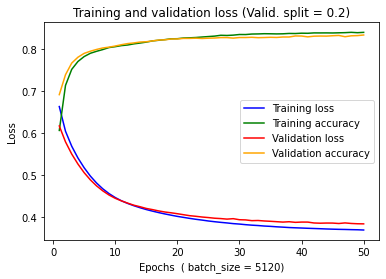

In [50]:
history_dict = history.history

loss_values  = history_dict['loss']
acc_values = history_dict['acc']

epochslist = range(1,  len(loss_values)+1)

plt.plot(epochslist, loss_values, 'b', label='Training loss')
plt.plot(epochslist, acc_values,'b', color='green', label='Training accuracy')
try:
    val_loss_values = history_dict['val_loss']
    plt.plot(epochslist, val_loss_values, 'b', color='red', label='Validation loss')
    val_acc_values = history_dict['val_acc']
    plt.plot(epochslist, val_acc_values, 'b', color='orange', label='Validation accuracy')
except KeyError:
    print ("Didn't find validation loss")

plt.title('Training and validation loss (Valid. split = ' + str( validation_split ) + ')')
plt.xlabel('Epochs  ( batch_size = ' + str( batch_size ) + ')')
plt.ylabel('Loss')
plt.legend()
plt.savefig('plots/train_validation_loss.pdf')

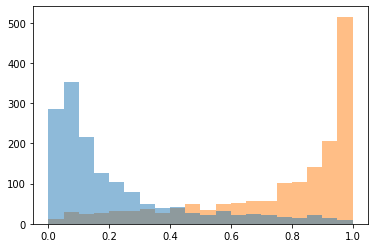

In [51]:
loaded_model = tf.keras.models.load_model('data/training.h5')

# use the model to predict whether an event is signal or background
y_test_pred = pd.DataFrame( loaded_model.predict( X_test.values  ) , index = X_test.index)

xbin = 20
hist, bins, ax = plt.hist( [ y_test_pred[y_test==0].values.flatten(), y_test_pred[y_test==1].values.flatten() ], xbin, log=False, label=['Background ('+ str((y_test==0).sum()) +')' ,'Signal ('+ str((y_test==1).sum()) +')'], histtype='stepfilled', alpha=0.5)
plt.savefig('plots/model_test.pdf')

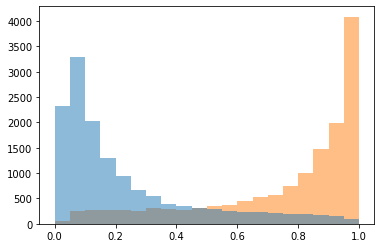

In [52]:
# use the model to predict whether an event is signal or background. this is with the training set
y_train_pred = pd.DataFrame( loaded_model.predict( X_train.values  ) , index = X_train.index)

xbin = 20
hist, bins, ax = plt.hist( [ y_train_pred[y_train==0].values.flatten(), y_train_pred[y_train==1].values.flatten() ], xbin, log=False, label=['Background ('+ str((y_test==0).sum()) +')' ,'Signal ('+ str((y_test==1).sum()) +')'], histtype='stepfilled', alpha=0.5) 
plt.savefig('plots/model_train.pdf')

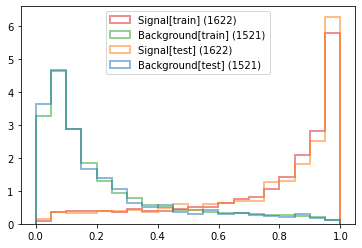

In [53]:
#loaded_model = tf.keras.models.load_model('data/training.h5')

# use the model to predict whether an event is signal or background
#y_test_pred = pd.DataFrame( loaded_model.predict( X_test.values  ) , index = X_test.index)

xbin = 20
hist, bins, ax = plt.hist( [ y_test_pred[y_test==0].values.flatten(), y_test_pred[y_test==1].values.flatten(), y_train_pred[y_train==0].values.flatten(), y_train_pred[y_train==1].values.flatten() ], xbin, log=False, label=['Background[test] ('+ str((y_test==0).sum()) +')' ,'Signal[test] ('+ str((y_test==1).sum()) +')','Background[train] ('+ str((y_test==0).sum()) +')' ,'Signal[train] ('+ str((y_test==1).sum()) +')'], histtype='step', linewidth=2, density=True, alpha=0.5)
plt.legend(loc="upper center")
plt.savefig('plots/model_testandtrain.pdf')

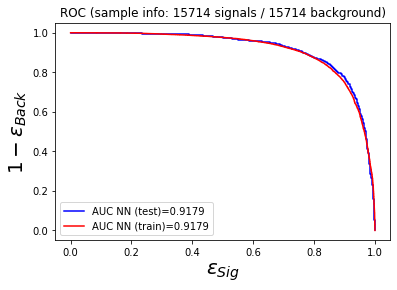

In [54]:
fpr_test, tpr_test, thresholds_test = roc_curve( y_test, y_test_pred )
auc_val_test = auc(fpr_test, tpr_test)

plt.plot( tpr_test, 1-fpr_test, 'b', label= 'AUC NN (test)=' + str(round(auc_val_test,4) ))


fpr_train, tpr_train, thresholds_test = roc_curve( y_train, y_train_pred )
auc_val_train = auc(fpr_test, tpr_test)

plt.plot( tpr_train, 1-fpr_train, 'r', label= 'AUC NN (train)=' + str(round(auc_val_train,4) ))


plt.title('ROC (sample info: ' + str( len( X_test[y_test == 1] ) + len( X_train[y_train == 1] ) ) + ' signals / '
                                              + str( len( X_test[y_test == 0] ) + len( X_train[y_train == 0] ) ) + ' background)'  )
plt.xlabel('$\epsilon_{Sig}$', fontsize = 20) # 'False positive rate'
plt.ylabel('$1-\epsilon_{Back}$', fontsize = 20) #  '1-True positive rate' 
plt.legend(loc ='lower left')
plt.savefig('plots/roc.pdf')

In [55]:
means = pd.DataFrame(X_mean)
with open('data/means.json', 'w') as f:
    f.write(means.to_json())

# load the data frame and convert it to a series with squeeze
means = pd.read_json('data/means.json').squeeze()

stds = pd.DataFrame(X_std)
with open('data/stds.json', 'w') as f:
    f.write(stds.to_json())

# load the data frame and convert it to a series with squeeze
stds = pd.read_json('data/stds.json').squeeze()

In [56]:
X_train.values

array([[-0.76504584,  0.9566202 ,  0.48861081, ...,  0.29081328,
        -1.33339947, -0.74867537],
       [-0.64595975, -1.21246955, -0.7284823 , ..., -1.13948641,
         0.60869677,  2.05584979],
       [-0.80442378, -1.34202003, -0.98154618, ..., -1.13948641,
         0.70866068,  1.78727124],
       ...,
       [ 1.75753101, -0.30107648, -0.41426545, ..., -1.13948641,
         2.08422268,  1.39257433],
       [-0.63713608,  0.18202757,  0.13760275, ...,  0.29081328,
        -0.92434325, -1.18354629],
       [-0.84529388, -0.60916542, -0.93133115, ..., -1.13948641,
        -0.62850804, -1.39999778]])

In [57]:
y_train_pred = pd.DataFrame( model.predict( X_train.values  ) , index = X_train.index)

In [58]:
model_l = tf.keras.models.load_model('data/training.h5')
model.predict( X_train.values  )

array([[0.30048513],
       [0.03278039],
       [0.04348053],
       ...,
       [0.9425314 ],
       [0.6133456 ],
       [0.051403  ]], dtype=float32)

In [59]:
import pickle
#with  as f:
pickle.dump(X_train, open('test.pkl', "wb"))

In [60]:
pickle.load(open('test.pkl', 'rb'))

,met,ht,lead_jet_pt,sublead_jet_pt,njets,bjets,nWs,nHs,nFatJets,met_significance,min_dphi_met_j4
301076,-0.765046,0.956620,0.488611,1.353390,1.170791,-0.919298,-0.492637,-0.15742,0.290813,-1.333399,-0.748675
37807,-0.645960,-1.212470,-0.728482,-1.073727,-1.442670,-0.919298,-0.492637,-0.15742,-1.139486,0.608697,2.055850
42112,-0.804424,-1.342020,-0.981546,-1.050677,-1.442670,0.684795,-0.492637,-0.15742,-1.139486,0.708661,1.787271
305409,0.880089,1.608845,1.862812,1.716240,-0.135940,-0.919298,-0.492637,-0.15742,0.290813,-0.238462,-0.752913
179490,-0.905584,1.841317,1.150853,1.082740,1.824156,-0.919298,-0.492637,-0.15742,1.721113,-1.644259,-1.182341
292784,-0.181607,-0.394987,-0.039393,-0.693961,0.517425,0.684795,-0.492637,-0.15742,-1.139486,-0.027185,-1.144114
255702,-1.054024,-0.067723,-0.929840,-0.382044,1.170791,-0.919298,-0.492637,-0.15742,0.290813,-1.229691,-1.303829
312973,0.120603,-0.319032,0.252948,-0.699166,-0.135940,-0.919298,-0.492637,-0.15742,-1.139486,0.245252,-0.368541
3955,-0.317679,-0.996462,-0.736437,-1.030787,-0.135940,0.684795,-0.492637,-0.15742,-1.139486,0.638512,1.652025
298796,-0.535975,0.106411,0.240022,0.322837,-0.789305,0.684795,2.020753,-0.15742,0.290813,-0.783535,0.243388
